In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [11]:
path = '/home/shakti/datasets/image/artists'

In [8]:
tfms = get_transforms(do_flip=False)

In [16]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=224, valid_pct=0.2).normalize(imagenet_stats)

In [17]:
data.classes

['Albrecht_Dürer',
 'Alfred_Sisley',
 'Amedeo_Modigliani',
 'Andrei_Rublev',
 'Andy_Warhol',
 'Camille_Pissarro',
 'Caravaggio',
 'Claude_Monet',
 'Diego_Rivera',
 'Diego_Velazquez',
 'Edgar_Degas',
 'Edouard_Manet',
 'Edvard_Munch',
 'El_Greco',
 'Eugene_Delacroix',
 'Francisco_Goya',
 'Frida_Kahlo',
 'Georges_Seurat',
 'Giotto_di_Bondone',
 'Gustav_Klimt',
 'Gustave_Courbet',
 'Henri_Matisse',
 'Henri_Rousseau',
 'Henri_de_Toulouse-Lautrec',
 'Hieronymus_Bosch',
 'Jackson_Pollock',
 'Jan_van_Eyck',
 'Joan_Miro',
 'Kazimir_Malevich',
 'Leonardo_da_Vinci',
 'Marc_Chagall',
 'Michelangelo',
 'Mikhail_Vrubel',
 'Pablo_Picasso',
 'Paul_Cezanne',
 'Paul_Gauguin',
 'Paul_Klee',
 'Peter_Paul_Rubens',
 'Pierre-Auguste_Renoir',
 'Piet_Mondrian',
 'Pieter_Bruegel',
 'Raphael',
 'Rembrandt',
 'Rene_Magritte',
 'Salvador_Dali',
 'Sandro_Botticelli',
 'Titian',
 'Vasiliy_Kandinskiy',
 'Vincent_van_Gogh',
 'William_Turner']

In [18]:
data

ImageDataBunch;

Train: LabelList (6757 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Rembrandt,Rembrandt,Rembrandt,Rembrandt,Rembrandt
Path: /home/shakti/datasets/image/artists;

Valid: LabelList (1689 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Pablo_Picasso,Vincent_van_Gogh,Rembrandt,Vincent_van_Gogh,Vincent_van_Gogh
Path: /home/shakti/datasets/image/artists;

Test: None

In [19]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.928046,1.838063,0.480758,02:28
1,1.921694,1.364218,0.372410,02:27
2,1.473948,1.226753,0.333925,02:28
3,1.203784,1.199403,0.323860,02:26


In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused()

[('glacier', 'mountain', 64),
 ('mountain', 'glacier', 44),
 ('buildings', 'street', 34),
 ('street', 'buildings', 32),
 ('glacier', 'sea', 19),
 ('mountain', 'sea', 15),
 ('glacier', 'forest', 4),
 ('sea', 'mountain', 4),
 ('glacier', 'street', 3),
 ('glacier', 'buildings', 2),
 ('mountain', 'buildings', 2),
 ('sea', 'buildings', 2),
 ('street', 'sea', 2),
 ('buildings', 'sea', 1),
 ('forest', 'mountain', 1),
 ('forest', 'sea', 1),
 ('forest', 'street', 1),
 ('mountain', 'forest', 1),
 ('mountain', 'street', 1),
 ('sea', 'glacier', 1),
 ('sea', 'street', 1)]

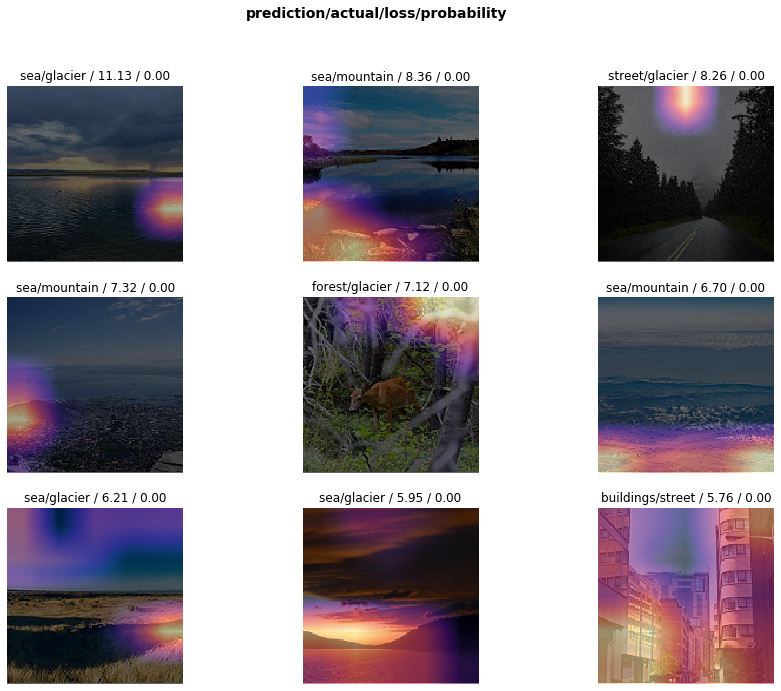

In [10]:
interp.plot_top_losses(9, figsize=(15,11))